# Lab 6. Minería de texto

## Miembros
- Fernanda Esquivel 21542
- Sofía Lam 21548

## Link al repositorio



In [1]:
import pandas as pd

# EJERCICIO 1




In [4]:
df_train = pd.read_csv('train.csv')

In [6]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df_train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

# Variables

Vemos que el dataset tiene 4 variables, el Id que es único para cada tweet. Un Keyword que básicamente hace un resumen de lo que habla el tweet. Location, la cuál nos dice la ubicación de dónde fue publicado el tweet sólo si se tiene activada la ubicación cuando se utiliza la aplicación. Y por último text que es el contenido del tweet.

In [8]:
null_key = df_train['keyword'].isna().sum()
null_key

61

De acá vemos que hay aproximadamente 26 datos que no tienen una keyword, entonces para no deshacernos de los datos, procedemos a rellenarlos con "no keyword"

In [9]:
df_train['keyword'] = df_train['keyword'].fillna('no keyword')
df_train['keyword'].isna().sum()

0

In [10]:
null_loc = df_train['location'].isna().sum()
null_loc

2533

De acá vemos que hay aún más datos sin la ubicación, esto puede deberse a que los usuarios prefieren mantener su ubicación fuera del alcance de la base de datos. Por lo que se procede a rellenar estas casillas con la frase "sin ubicación".

In [11]:
df_train['location'] = df_train['location'].fillna('sin ubicacion')
df_train['keyword'].isna().sum()

0

In [12]:
df_train.head()

,id,keyword,location,text,target
0,1,no keyword,sin ubicacion,Our Deeds are the Reason of this #earthquake M...,1
1,4,no keyword,sin ubicacion,Forest fire near La Ronge Sask. Canada,1
2,5,no keyword,sin ubicacion,All residents asked to 'shelter in place' are ...,1
3,6,no keyword,sin ubicacion,"13,000 people receive #wildfires evacuation or...",1
4,7,no keyword,sin ubicacion,Just got sent this photo from Ruby #Alaska as ...,1


Se crea la función que nos permite estandarizar el texto, de manera que se escribe todo el contenido del tweet en minusculas, se retiran los símbolos como "#" o "@". Se eliminan los URLs, los emoticones, los símbolos.

In [27]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')


def limpiar_texto(texto):

    texto = texto.lower()
    texto = re.sub(r"[#@']", "", texto)
    texto = re.sub(r"http\S+|www\S+|https\S+", "", texto, flags=re.MULTILINE)
    texto = texto.encode('ascii', 'ignore').decode('ascii')
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(texto)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    texto_limpio = ' '.join(tokens)
    return texto_limpio

df_train['texto_limpio'] = df_train['text'].apply(limpiar_texto)
df_train.head()
df_train['texto_limpio'] = df_train['text'].apply(limpiar_texto)
df_train.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target,texto_limpio
0,1,no keyword,sin ubicacion,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,no keyword,sin ubicacion,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,no keyword,sin ubicacion,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,no keyword,sin ubicacion,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,no keyword,sin ubicacion,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


Finalmente tenemos el data frame limpio, para esto se rellenaron los espacios vacíos tanto en la columna keyword como en la columna location. Además, se agregó una columna con el texto del tweet limpio, del cuál se quitaron los símbolos mencionados anteriormente, y las mayusculas, además de que se eliminan los stopwords.

Para ver las diferentes keywords que hay en el data frame test


In [15]:
# Ver los valores únicos en la columna 'keyword'
unique_keywords = df_train['keyword'].unique()
print("Categorías únicas en 'keyword':")
print(unique_keywords)


Categorías únicas en 'keyword':
['no keyword' 'ablaze' 'accident' 'aftershock' 'airplane%20accident'
 'ambulance' 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army'
 'arson' 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'd

# Frecuencia de las palabras de los tweets

In [16]:
tweets_desastre = df_train[df_train['target'] == 1]['texto_limpio']
tweets_no_desastre = df_train[df_train['target'] == 0]['texto_limpio']


Ahora se tokeniza la columna de texto limpio para poder analizar la frecuencia de cada palabra y posteriormente realizar los bigramas, trigramas y las gráficas para el análisis correspondiente

In [24]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('punkt')
def contar_frecuencia(tweets):
    todas_las_palabras = ' '.join(tweets).lower()
    tokens = word_tokenize(todas_las_palabras)
    frecuencias = Counter(tokens)
    return frecuencias

frecuencia_desastre = contar_frecuencia(tweets_desastre)
frecuencia_no_desastre = contar_frecuencia(tweets_no_desastre)
print("Palabras más comunes en tweets de desastre:")
print(frecuencia_desastre)
print("\nPalabras más comunes en tweets que no son de desastre:")
print(frecuencia_no_desastre)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Palabras más comunes en tweets de desastre:
Counter({'fire': 180, 'news': 136, 'via': 121, 'disaster': 117, 'california': 111, 'suicide': 110, 'police': 107, 'amp': 106, 'people': 105, 'killed': 93, 'like': 92, 'hiroshima': 86, 'storm': 85, 'crash': 84, 'fires': 84, 'us': 81, 'families': 81, 'train': 79, 'emergency': 76, 'bomb': 75, 'buildings': 75, '2': 73, 'two': 71, 'nuclear': 71, 'mh370': 71, 'attack': 69, 'video': 69, 'wildfire': 69, 'get': 66, 'accident': 66, 'bombing': 66, 'one': 65, 'northern': 64, 'burning': 64, 'dead': 63, 'pm': 62, 'legionnaires': 62, 'bomber': 60, 'im': 58, 'war': 58, 'homes': 58, 'car': 57, 'still': 57, 'new': 56, 'atomic': 56, 'dont': 54, 'obama': 54, 'fatal': 54, 'years': 53, 'collapse': 51, 'may': 50, 'forest': 50, 'debris': 50, 'watch': 50, 'first': 49, 'japan': 49, 'malaysia': 49, 'man': 48, 'latest': 48, 'water': 48, 'mass': 48, 'near': 47, 'rt': 47, 'severe': 47, 'today': 46, 'earthquake': 45, 'confirmed': 45, 'found': 44, 'oil': 44, 'home': 42, 'ar

In [18]:
# Palabra más repetida en tweets de desastre
palabra_mas_comun_desastre = frecuencia_desastre.most_common(1)
print(f"Palabra más repetida en tweets de desastre: {palabra_mas_comun_desastre}")

# Palabra más repetida en tweets que no son de desastre
palabra_mas_comun_no_desastre = frecuencia_no_desastre.most_common(1)
print(f"Palabra más repetida en tweets que no son de desastre: {palabra_mas_comun_no_desastre}")


Palabra más repetida en tweets de desastre: [('fire', 180)]
Palabra más repetida en tweets que no son de desastre: [('like', 253)]


Como vemos anteriormente, la palbra más común para aquellos tweets sobre desastres es "fire". Mientras que para aquellos tweets que no hablan de un desastre la palabra más común es "like".

1. **¿Qué palabras cree que le servirán para hacer un mejor modelo de clasificación?**

   - Las palabras que expresan emociones y sentimientos y su intensidad o qué tan fuerte se sienten son importantes para poder realizar la clasificación. Para esto se utilizará la librería de SentiWords en python, para poder llevar a cabo su identificación y clasificación.

2. **¿Vale la pena explorar bigramas o trigramas para analizar contexto?**

   - Sí, explorar bigramas y trigramas es útil para capturar combinaciones de palabras que pueden proporcionar contexto adicional y matices en el análisis de sentimientos.


  
## ANÁLISIS EXPLORATORIO

# Bigramas y Trigramas
Ahora bien, realizamos los bigramas y trigramas para poder analizar aquellas palabras que tienden a ir juntas en los tweets.

In [28]:
from nltk import bigrams, trigrams

# Función para contar la frecuencia de bigramas
def contar_bigramas(tweets):
    todas_las_palabras = ' '.join(tweets).lower()
    tokens = word_tokenize(todas_las_palabras)
    bigrama_frecuencia = Counter(bigrams(tokens))
    return bigrama_frecuencia

# Función para contar la frecuencia de trigramas
def contar_trigramas(tweets):
    todas_las_palabras = ' '.join(tweets).lower()
    tokens = word_tokenize(todas_las_palabras)
    trigrama_frecuencia = Counter(trigrams(tokens))
    return trigrama_frecuencia

# Obtener frecuencias de bigramas y trigramas para tweets de desastre
bigramas_desastre = contar_bigramas(tweets_desastre)
trigramas_desastre = contar_trigramas(tweets_desastre)

print("\nBigramas más comunes en tweets de desastre:")
print(bigramas_desastre.most_common(10))

print("\nTrigramas más comunes en tweets de desastre:")
print(trigramas_desastre.most_common(10))



Bigramas más comunes en tweets de desastre:
[(('suicide', 'bomber'), 59), (('northern', 'california'), 41), (('oil', 'spill'), 38), (('burning', 'buildings'), 35), (('suicide', 'bombing'), 34), (('california', 'wildfire'), 34), (('70', 'years'), 30), (('bomber', 'detonated'), 30), (('confirmed', 'mh370'), 29), (('homes', 'razed'), 29)]

Trigramas más comunes en tweets de desastre:
[(('suicide', 'bomber', 'detonated'), 30), (('northern', 'california', 'wildfire'), 29), (('latest', 'homes', 'razed'), 28), (('homes', 'razed', 'northern'), 28), (('pkk', 'suicide', 'bomber'), 28), (('bomber', 'detonated', 'bomb'), 28), (('razed', 'northern', 'california'), 27), (('16yr', 'old', 'pkk'), 27), (('old', 'pkk', 'suicide'), 27), (('families', 'sue', 'legionnaires'), 26)]


De esto podemos ver que el bigrama más común en los tweets de desastre es "(suicide, bomber)"y el trigrama más común para estos mismos tweets es "(suicide, bomber, detonated)"

# Nube de palabras
Ahora se crea una nube de palabras sobre cada tweet según su categoría

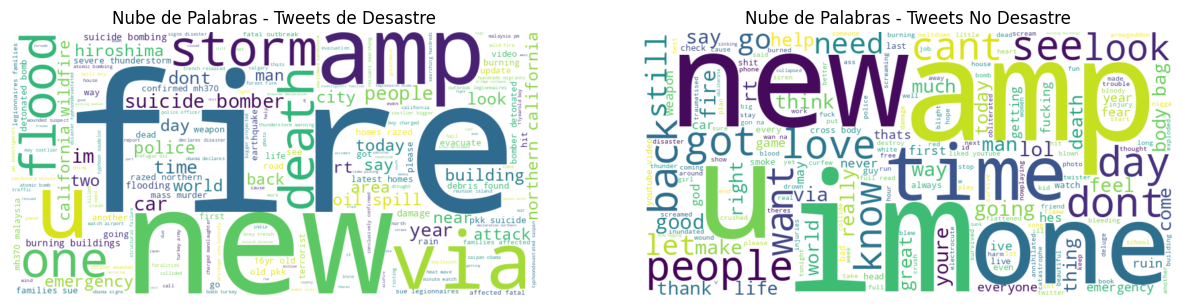

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud_desastre = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tweets_desastre))
wordcloud_no_desastre = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tweets_no_desastre))
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_desastre, interpolation='bilinear')
plt.title('Nube de Palabras - Tweets de Desastre')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_no_desastre, interpolation='bilinear')
plt.title('Nube de Palabras - Tweets No Desastre')
plt.axis('off')
plt.show()


# Histogramas
Ahora realizamos los histogramas con las palbras más repetidas según los distintos tweets

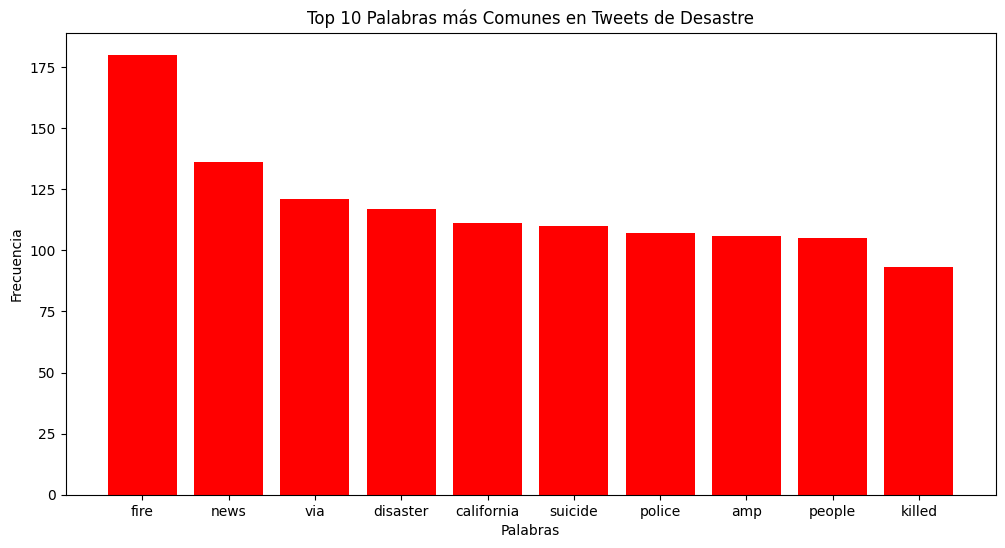

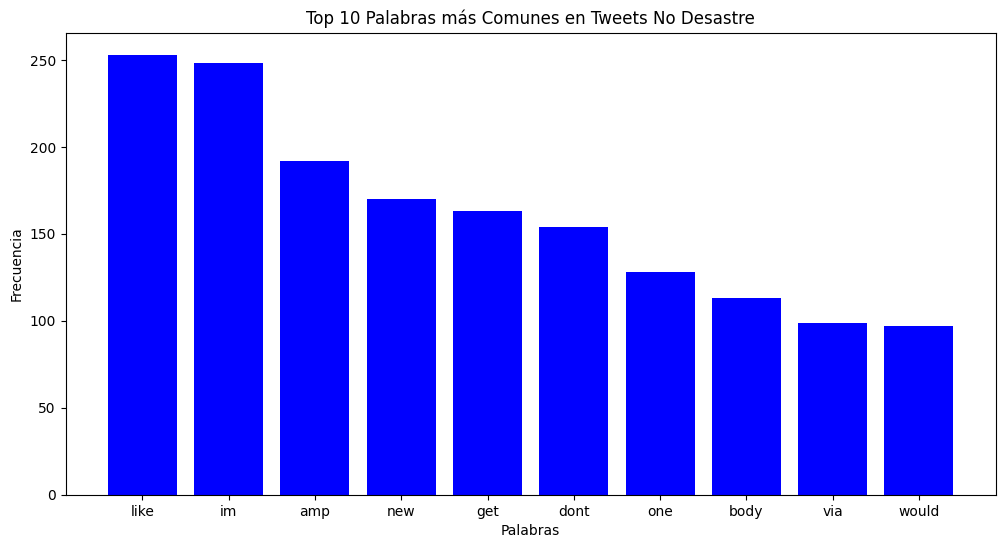

In [21]:
frecuencias_desastre_top10 = frecuencia_desastre.most_common(10)
palabras_desastre, conteos_desastre = zip(*frecuencias_desastre_top10)
plt.figure(figsize=(12, 6))
plt.bar(palabras_desastre, conteos_desastre, color='red')
plt.title('Top 10 Palabras más Comunes en Tweets de Desastre')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

frecuencias_no_desastre_top10 = frecuencia_no_desastre.most_common(10)
palabras_no_desastre, conteos_no_desastre = zip(*frecuencias_no_desastre_top10)
plt.figure(figsize=(12, 6))
plt.bar(palabras_no_desastre, conteos_no_desastre, color='blue')
plt.title('Top 10 Palabras más Comunes en Tweets No Desastre')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()


Ahora buscamos aquellas palabras que son comunes en ambas categorías

In [22]:
palabras_comunes = set(frecuencia_desastre.keys()).intersection(set(frecuencia_no_desastre.keys()))
print("Palabras comunes en ambas categorías:")
print(palabras_comunes)

Palabras comunes en ambas categorías:
{'china', 'alaska', 'steps', 'lose', 'eat', 'part', 'emmerdale', 'thoughts', 'applies', 'trillion', 'explosion', 'shakes', 'showed', 'cause', 'perquisite', 'lgbt', 'sentinel', 'recommend', 'concerns', 'ahh', 'wake', 'info', 'detained', 'henry', 'support', 'cement', 'atlanta', 'motion', 'keep', 'equipment', 'snd', 'cancelled', 'cost', 'picking', '360wisenews', 'punishment', 'legal', 'glorious', 'quite', 'sick', 'trump', 'r', 'warns', 'fennovoima', 'dog', 'listen', 'waiting', 'ok', 'unconfirmed', 'linked', 'stores', 'escape', 'mo', 'costs', 'collapse', 'mullah', 'last', 'tune', 'co', 'alarm', 'sisters', 'fatality', 'euro', 'squad', 'comments', 'table', 'inundated', 'bounty', 'remove', 'abuseddesolateamplost', 'ptsd', 'wasnt', 'trip', 'tough', 'orders', 'helps', 'hunk', 'nearly', 'bars', 'department', 'sees', 'responsible', 'rescue', 'simulate', 'confirm', 'cd', 'weighs', 'tho', 'technology', 'hunger', 'missed', 'looked', 'cover', 'heart', 'gun', 'ani

# Determinar palabras positivas, negativas o neutras

In [31]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Clasificar palabras y separarlas en categorías
positivas = []
negativas = []
neutral = []

for word in palabras_comunes:
    score = sia.polarity_scores(word)['compound']
    if score >= 0.05:
        positivas.append(word)
    elif score <= -0.05:
        negativas.append(word)
    else:
        neutral.append(word)

print("Positive words:", positivas)
print("Negative words:", negativas)
print("Neutral words:", neutral)


Positive words: ['recommend', 'support', 'legal', 'glorious', 'ok', 'escape', 'helps', 'responsible', 'rescue', 'improve', 'joke', 'truly', 'survived', 'fair', 'join', 'cool', 'precious', 'huge', 'integrity', 'accept', 'certain', 'dear', 'benefits', 'surely', 'adventures', 'allow', 'respect', 'approves', 'gift', 'free', 'fresh', 'hail', 'calm', 'want', 'friend', 'promises', 'interest', 'solution', 'charity', 'pray', 'luck', 'better', 'bless', 'awesome', 'inspiring', 'blessings', 'love', 'helping', 'funny', 'greatest', 'safe', 'thanks', 'happily', 'enjoy', 'engage', 'safely', 'yeah', 'grand', 'rescued', 'safety', 'win', 'loving', 'hopefully', 'laughing', 'justice', 'hope', 'alive', 'friends', 'jp', 'pls', 'excellent', 'best', 'favorite', 'freedom', 'appreciated', 'saved', 'peace', 'vip', 'protect', 'approval', 'good', 'number', 'relief', 'wow', 'happy', 'alert', 'top', 'wd', 'created', 'progress', 'xd', 'natural', 'agreed', 'clearly', 'like', 'value', 'growth', 'values', 'dream', 'ready

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
